In [2]:
import pandas as pd
import numpy as np
import re
import os
from argparse import Namespace
from tqdm.notebook import tqdm
import seaborn as sns

In [3]:
args = Namespace(
    rawCSV = "roi_data.csv",
    contextual_data = "context.json",
    modifiedCSV = "roi_data_new.csv",
)

In [14]:
df.shape

(1382862, 43)

In [6]:
def sortFunc(e):
    return len(e[1])

In [4]:
df = pd.read_csv(args.modifiedCSV)
df["roi"]=df.apply(lambda x: int(x["conversion_roi"]+0.5),axis=1)
df["unique"] = df.index

In [45]:
nameList = [(name,list(df[name].unique())) for name in df.columns]
nameList.sort(reverse=True, key=sortFunc)

In [50]:
dictResult = {}
dictResult["FieldName"] = df.columns
roiThreshold = 0.5
for roi in tqdm(range(7), desc='Generate row summary of ROI'):
    if roi==6:
        dfTemp = df
        colname = "roi all"
    else:
        dfTemp = df[df.apply(lambda x: (x["roi"]<roi+roiThreshold) and (x["roi"]>roi-roiThreshold), axis=1)]
        colname = "roi={}".format(roi)
    dictResult[colname]= [dfTemp[name].unique().shape[0] for name in df.columns]
dfSummary = pd.DataFrame.from_dict(dictResult)

Generate row summary of ROI:   0%|          | 0/7 [00:00<?, ?it/s]

In [16]:
df["overlapped_brain_pixel_selections"].unique()

array(['nulls', 'mm:1535320:8786:1', 'mm:1535320:66552:1', ...,
       'mm:1535320:4332:13', 'mm:1535320:9478:2', 'mm:1535320:4202:10'],
      dtype=object)

In [51]:
result = dfSummary.sort_values(by=["roi={}".format(i) for i in range(6)], ascending=False)
print(result.to_string())
result.to_clipboard()

                            FieldName    roi=0  roi=1  roi=2  roi=3  roi=4  roi=5  roi all
42                             unique  1363729  14994   2956    767    319     97  1382862
0                       mm_auction_id  1355952  14982   2956    767    319     97  1371261
1                       imp_timestamp   725967  14852   2951    766    319     97   730305
22  overlapped_brain_pixel_selections   162793   7450   1437    368    162     43   166170
36                       exchange_ctr    66400   1240    246     52     20     11    66951
7                             site_id    34710   3353   1125    408    181     67    34900
38                        base_domain    16035   2348    901    342    170     63    16120
6                        publisher_id     9440   1808    749    319    155     68     9492
23                      hashed_app_id     3849    483    143     43     14     11     3873
40                     conversion_roi     2422   3106   1461    563    274     83     7909

In [57]:
table = pd.pivot_table(df, values='unique', index=["site_id","base_domain"],aggfunc='count')
print(table)

                                unique
site_id     base_domain               
-2137259393 jetnation.com            1
-2126744109 techradar.com            3
-2123075450 nwitimes.com             1
-2110315280 salary.com               1
-2100762512 sportsbrief.com          1
...                                ...
 2146787860 trendbihar.com           1
 2146930688 scrillap.com             1
 2147040911 formodernkids.com        1
 2147083469 thegirlonbloor.com      26
 2147429265 blogspot.com             7

[75312 rows x 1 columns]


In [5]:
table = pd.pivot_table(df, values='unique', index=["roi"],aggfunc='count')
print(table)

      unique
roi         
0    1363729
1      14994
2       2956
3        767
4        319
5         97


In [57]:
table = pd.pivot_table(df, values='unique', index=["site_id","base_domain"],aggfunc='count')
print(table)

                                unique
site_id     base_domain               
-2137259393 jetnation.com            1
-2126744109 techradar.com            3
-2123075450 nwitimes.com             1
-2110315280 salary.com               1
-2100762512 sportsbrief.com          1
...                                ...
 2146787860 trendbihar.com           1
 2146930688 scrillap.com             1
 2147040911 formodernkids.com        1
 2147083469 thegirlonbloor.com      26
 2147429265 blogspot.com             7

[75312 rows x 1 columns]


In [53]:
result = dfSummary.sort_values(by="FieldName")
print(result.to_string())
result.to_clipboard()

                            FieldName    roi=0  roi=1  roi=2  roi=3  roi=4  roi=5  roi all
38                        base_domain    16035   2348    901    342    170     63    16120
26                            browser       33     20     15     11     11     10       33
18                         browser_id       11     11     11      9      9      9       11
20                browser_language_id       66     21     10      5      3      3       66
27                    browser_version      626    209    103     59     40     18      626
15                        category_id      327    159    112     76     49     29      327
21                       channel_type        3      3      3      3      3      3        3
13                         conn_speed        3      2      2      1      1      1        3
40                     conversion_roi     2422   3106   1461    563    274     83     7909
10                         country_id        2      2      2      2      2      2        2

In [47]:
result.to_clipboard()

In [21]:
for i in range(17,42,1):
    fieldName = nameList[i][0]
    table = pd.pivot_table(df, values='mm_auction_id', index=[fieldName],aggfunc='count')
    print(table.to_string())

                     mm_auction_id
browser_language_id               
0                           335573
24931                           71
24932                            4
24934                           10
24935                            2
24937                            1
24938                          303
24939                           12
24940                           14
24944                            3
24948                           25
25198                            5
25703                            1
25705                           32
25956                           87
25960                           36
25972                           24
26209                            2
26466                            6
26473                            3
26740                           22
26746                         2347
26982                            6
26984                           13
26995                            1
26998                          151
27489               

In [43]:
roi = 4
dfTemp = df[df.apply(lambda x: (x["roi"]<roi+0.5) and (x["roi"]>roi-0.5), axis=1)]
list(dfTemp["base_domain"].unique())

['fandom.com',
 'punchbowl.com',
 'insider.com',
 'signupgenius.com',
 'nba.com',
 'yahoo.com',
 'aol.com',
 'everydaymonkey.com',
 nan,
 'cosmopolitan.com',
 'zoosk.com',
 'weather.com',
 'laylita.com',
 'zillow.com',
 'tastyarea.com',
 'upworthy.com',
 'skinnyandtasty.com',
 'hollywoodlife.com',
 'wusa9.com',
 'heraldweekly.com',
 'rent.com',
 'travado.net',
 'parentmood.com',
 '247mirror.com',
 'tomshardware.com',
 'thesaurus.com',
 'quizlet.com',
 'tigernet.com',
 'inspiredtaste.net',
 'picrew.me',
 'hourdetroit.com',
 'nj.com',
 'xfinity.com',
 'realtor.com',
 'prensalibre.com',
 'hipporeport.com',
 'thesun.co.uk',
 'greatschools.org',
 'hebbarskitchen.com',
 'daily-choices.com',
 'etonline.com',
 'azcentral.com',
 'thekrazycouponlady.com',
 'dailymail.co.uk',
 'carsandyachts.com',
 'huaren.us',
 'wattpad.com',
 'aubtu.biz',
 'wcvb.com',
 'spotify.com',
 'cheezburger.com',
 'thecozycook.com',
 'zacks.com',
 'giantfreakinrobot.com',
 'theecofeed.com',
 'footwearnews.com',
 'tutoria

<AxesSubplot:xlabel='roi', ylabel='Count'>

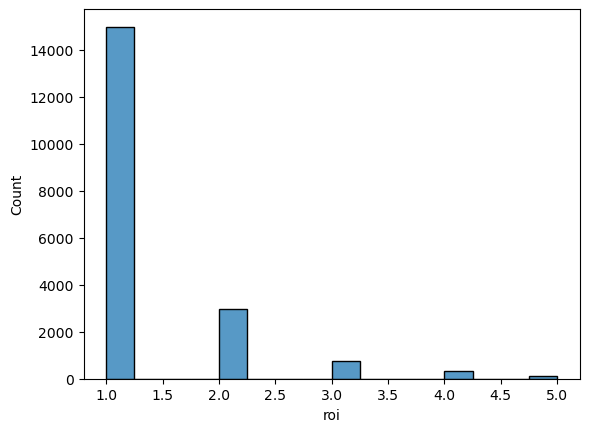

In [5]:
sns.histplot(data=dfSub, x="roi")